# 1. Introduction to Beta–Binomial Model

This notebook introduces the **Beta–Binomial model** for grouped binary outcomes. We'll explore the concepts step-by-step with clear explanations and examples.

## 1.1 What is the Beta–Binomial Model?

The Beta–Binomial model is a **Bayesian hierarchical model** that combines:
- **Binomial distribution**: Models the number of successes out of a fixed number of attempts
- **Beta distribution**: Models the uncertainty about the underlying success probability

This model is particularly useful when:
- You have **grouped count data** (e.g., each student attempts several problems)
- Each group has its own unknown success probability
- You want to **incorporate prior knowledge** and get **uncertainty estimates**


## 1.2 The Bayesian Framework

In Bayesian statistics, we:

1. Start with a **prior** belief about the success probability (Beta distribution)
2. Observe **data** (number of successes out of attempts)
3. Update our belief to get a **posterior** distribution (also Beta)

### Why Beta Prior?

The Beta distribution is the **conjugate prior** for the Binomial likelihood. This means:
- If our prior is Beta(α, β) and we observe binomial data
- Our posterior is also Beta(α', β') where:
  - α' = α + successes
  - β' = β + failures

This makes calculations simple and interpretable!

**Conjugate prior advantage**: No complex integrals needed - just add the observed successes and failures to the prior parameters!


## 1.3 Import Libraries

Let's start by importing the necessary libraries:


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

print("Libraries imported successfully!")


Libraries imported successfully!


## 1.4 Example 1: Basic Posterior Update

Let's work through a simple example:

**Scenario**: A student attempts 5 problems and succeeds on 3 of them. What can we infer about their true success probability?

### Step 1: Set Up the Prior

The prior represents our belief **before** seeing the data. We'll use Beta(α=2, β=2), which:
- Has a mean of α/(α+β) = 2/(2+2) = 0.5 (50% success rate)
- Is symmetric and represents moderate uncertainty
- Is equivalent to having observed 2 successes and 2 failures previously


In [4]:
# Prior parameters: Beta(alpha_prior, beta_prior)
alpha_prior = 2.0
beta_prior = 2.0

# Prior mean (expected success probability before seeing data)
prior_mean = alpha_prior / (alpha_prior + beta_prior)

print(f"Prior: Beta(α={alpha_prior}, β={beta_prior})")
print(f"Prior mean (expected success probability): {prior_mean:.1%}")
print(f"Interpretation: We believe the student has a 50% chance of success, with moderate uncertainty")


Prior: Beta(α=2.0, β=2.0)
Prior mean (expected success probability): 50.0%
Interpretation: We believe the student has a 50% chance of success, with moderate uncertainty


### Step 2: Observe the Data

Now we observe the actual performance:


In [5]:
# Observed data
attempts = 5
successes = 3
failures = attempts - successes

print(f"Observed data:")
print(f"  - Attempts: {attempts}")
print(f"  - Successes: {successes}")
print(f"  - Failures: {failures}")
print(f"  - Observed success rate: {successes/attempts:.1%}")


Observed data:
  - Attempts: 5
  - Successes: 3
  - Failures: 2
  - Observed success rate: 60.0%


### Step 3: Calculate the Posterior

The posterior combines our prior belief with the observed data:

**Posterior parameters:**
- α_post = α_prior + successes = 2 + 3 = 5
- β_post = β_prior + failures = 2 + 2 = 4

This is equivalent to starting with 2 successes and 2 failures (prior), then adding 3 more successes and 2 more failures (data), giving us a total of 5 successes and 4 failures.


In [6]:
# Update: Calculate posterior parameters
alpha_post = alpha_prior + successes
beta_post = beta_prior + failures

# Posterior mean (our best estimate of the success probability)
post_mean = alpha_post / (alpha_post + beta_post)

print(f"Posterior: Beta(α={alpha_post}, β={beta_post})")
print(f"Posterior mean (estimated success probability): {post_mean:.4f} ({post_mean:.1%})")
print(f"\nInterpretation:")
print(f"  - Before data: We believed 50% success rate")
print(f"  - After seeing {successes} successes out of {attempts}: We now estimate {post_mean:.1%}")
print(f"  - The data shifted our estimate upward because {successes}/{attempts} = {(successes/attempts):.1%} > 50%")


Posterior: Beta(α=5.0, β=4.0)
Posterior mean (estimated success probability): 0.5556 (55.6%)

Interpretation:
  - Before data: We believed 50% success rate
  - After seeing 3 successes out of 5: We now estimate 55.6%
  - The data shifted our estimate upward because 3/5 = 60.0% > 50%


### Step 4: Calculate Credible Intervals

The posterior mean gives us a point estimate, but we also want to quantify **uncertainty**. We can compute a credible interval, which is the Bayesian equivalent of a confidence interval.

For an 80% credible interval, we want the range that contains 80% of the probability mass. Since we're using a symmetric interval, we want:
- Lower bound: 10th percentile (leaving 10% below and 10% above)
- Upper bound: 90th percentile


In [7]:
# Calculate 80% credible interval
confidence = 0.8
lower_percentile = (1 - confidence) / 2  # 0.1 (10th percentile)
upper_percentile = 1 - lower_percentile    # 0.9 (90th percentile)

ci_lower = beta.ppf(lower_percentile, alpha_post, beta_post)
ci_upper = beta.ppf(upper_percentile, alpha_post, beta_post)

print(f"80% Credible Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"                    : [{ci_lower:.1%}, {ci_upper:.1%}]")
print(f"\nInterpretation:")
print(f"  - We are 80% confident that the true success probability is between {ci_lower:.1%} and {ci_upper:.1%}")
print(f"  - Our best estimate (posterior mean) is {post_mean:.1%}, which lies in this interval")


80% Credible Interval: [0.3446, 0.7603]
                    : [34.5%, 76.0%]

Interpretation:
  - We are 80% confident that the true success probability is between 34.5% and 76.0%
  - Our best estimate (posterior mean) is 55.6%, which lies in this interval


### Step 5: Visualize Prior vs Posterior

Let's visualize how our belief changes from prior to posterior. This helps us understand:
1. How the data shifts our estimate
2. How much more certain we become after seeing the data


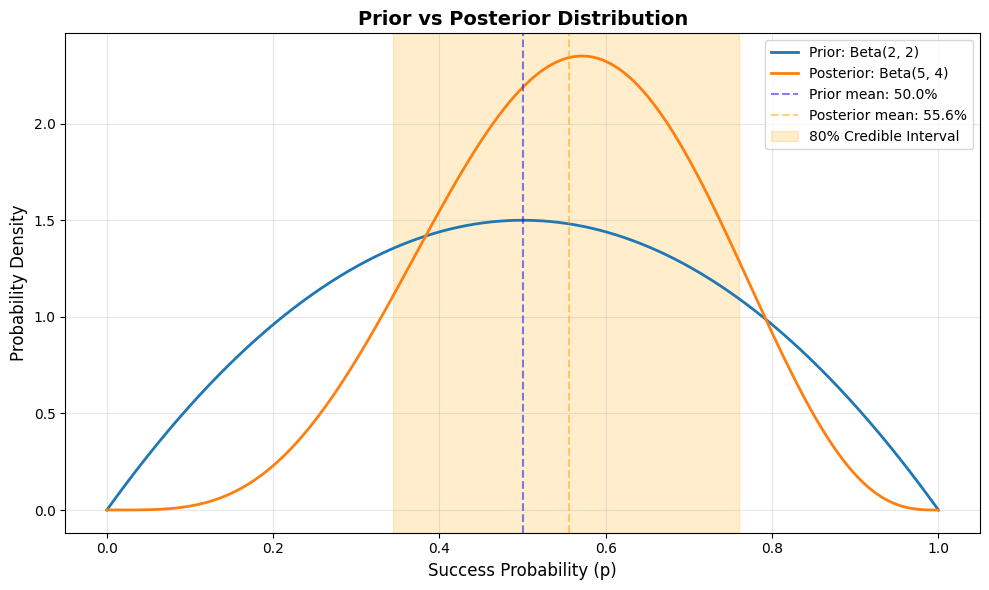


Key observations:
1. Prior is centered at 50.0% with high uncertainty (wide, flat curve)
2. Posterior is shifted toward 55.6% and is narrower (more certain)
3. The more data we observe, the more confident we become (narrower distribution)


In [8]:
# Create a range of probability values
p_range = np.linspace(0, 1, 1000)

# Calculate probability densities
prior_pdf = beta.pdf(p_range, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(p_range, alpha_post, beta_post)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(p_range, prior_pdf, label=f'Prior: Beta({int(alpha_prior)}, {int(beta_prior)})', linewidth=2)
plt.plot(p_range, posterior_pdf, label=f'Posterior: Beta({int(alpha_post)}, {int(beta_post)})', linewidth=2)

# Add vertical lines for means
plt.axvline(prior_mean, color='blue', linestyle='--', alpha=0.5, label=f'Prior mean: {prior_mean:.1%}')
plt.axvline(post_mean, color='orange', linestyle='--', alpha=0.5, label=f'Posterior mean: {post_mean:.1%}')

# Shade credible interval
plt.axvspan(ci_lower, ci_upper, alpha=0.2, color='orange', label=f'80% Credible Interval')

plt.xlabel('Success Probability (p)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Prior vs Posterior Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKey observations:")
print(f"1. Prior is centered at {prior_mean:.1%} with high uncertainty (wide, flat curve)")
print(f"2. Posterior is shifted toward {post_mean:.1%} and is narrower (more certain)")
print(f"3. The more data we observe, the more confident we become (narrower distribution)")


## 1.5 Example 2: Different Scenarios

Let's compare how different outcomes affect our posterior beliefs. We'll use the same prior but observe different results:


In [9]:
# Same prior for all scenarios
alpha_prior = 2.0
beta_prior = 2.0

# Different scenarios
scenarios = [
    {"name": "Scenario A: Poor performance", "attempts": 5, "successes": 1},
    {"name": "Scenario B: Moderate performance", "attempts": 5, "successes": 3},
    {"name": "Scenario C: Good performance", "attempts": 5, "successes": 4},
    {"name": "Scenario D: Perfect performance", "attempts": 5, "successes": 5},
]

results = []
for scenario in scenarios:
    alpha_post = alpha_prior + scenario["successes"]
    beta_post = beta_prior + (scenario["attempts"] - scenario["successes"])
    post_mean = alpha_post / (alpha_post + beta_post)
    ci_lower = beta.ppf(0.1, alpha_post, beta_post)
    ci_upper = beta.ppf(0.9, alpha_post, beta_post)
    
    results.append({
        "Scenario": scenario["name"],
        "Successes": scenario["successes"],
        "Posterior Mean": post_mean,
        "80% CI Lower": ci_lower,
        "80% CI Upper": ci_upper,
    })

# Create DataFrame for nice display
df_results = pd.DataFrame(results)
df_results["Posterior Mean"] = df_results["Posterior Mean"].apply(lambda x: f"{x:.1%}")
df_results["80% CI"] = df_results.apply(
    lambda row: f"[{row['80% CI Lower']:.1%}, {row['80% CI Upper']:.1%}]", 
    axis=1
)

print("Comparison of Different Outcomes (same prior: Beta(2, 2)):")
print("=" * 80)
for _, row in df_results.iterrows():
    print(f"\n{row['Scenario']}")
    print(f"  Observed: {row['Successes']}/5 = {row['Successes']/5:.1%}")
    print(f"  Posterior mean: {row['Posterior Mean']}")
    print(f"  80% Credible Interval: {row['80% CI']}")

# Display as table
print("\n" + "=" * 80)
print(df_results[["Scenario", "Successes", "Posterior Mean", "80% CI"]].to_string(index=False))


Comparison of Different Outcomes (same prior: Beta(2, 2)):

Scenario A: Poor performance
  Observed: 1/5 = 20.0%
  Posterior mean: 33.3%
  80% Credible Interval: [14.7%, 53.8%]

Scenario B: Moderate performance
  Observed: 3/5 = 60.0%
  Posterior mean: 55.6%
  80% Credible Interval: [34.5%, 76.0%]

Scenario C: Good performance
  Observed: 4/5 = 80.0%
  Posterior mean: 66.7%
  80% Credible Interval: [46.2%, 85.3%]

Scenario D: Perfect performance
  Observed: 5/5 = 100.0%
  Posterior mean: 77.8%
  80% Credible Interval: [59.4%, 93.1%]

                        Scenario  Successes Posterior Mean         80% CI
    Scenario A: Poor performance          1          33.3% [14.7%, 53.8%]
Scenario B: Moderate performance          3          55.6% [34.5%, 76.0%]
    Scenario C: Good performance          4          66.7% [46.2%, 85.3%]
 Scenario D: Perfect performance          5          77.8% [59.4%, 93.1%]


**Key Insight**: Notice how:
- Poor performance (1/5) shifts the posterior down significantly
- Good performance (4/5 or 5/5) shifts it up
- The posterior always combines prior and data - it never ignores either!


## 1.6 Example 3: Effect of Prior Strength

The prior parameters determine how much "weight" our prior belief has. Higher α + β means a stronger prior (less influenced by new data).

**Prior strength = α + β**
- **Weak prior** (e.g., α=1, β=1): Equivalent to having seen only 2 observations total
- **Strong prior** (e.g., α=10, β=10): Equivalent to having seen 20 observations total

Let's compare weak vs strong priors with the same data:


In [10]:
# Same observed data
attempts = 5
successes = 3

# Compare different prior strengths
priors = [
    {"name": "Weak prior", "alpha": 1.0, "beta": 1.0},
    {"name": "Moderate prior", "alpha": 2.0, "beta": 2.0},
    {"name": "Strong prior", "alpha": 10.0, "beta": 10.0},
]

prior_results = []
for prior_info in priors:
    alpha_prior = prior_info["alpha"]
    beta_prior = prior_info["beta"]
    prior_strength = alpha_prior + beta_prior
    prior_mean = alpha_prior / (alpha_prior + beta_prior)
    
    alpha_post = alpha_prior + successes
    beta_post = beta_prior + (attempts - successes)
    post_mean = alpha_post / (alpha_post + beta_post)
    
    prior_results.append({
        "Prior": prior_info["name"],
        "α + β": prior_strength,
        "Prior Mean": prior_mean,
        "Posterior Mean": post_mean,
        "Shift": post_mean - prior_mean,
    })

df_priors = pd.DataFrame(prior_results)
df_priors["Prior Mean"] = df_priors["Prior Mean"].apply(lambda x: f"{x:.1%}")
df_priors["Posterior Mean"] = df_priors["Posterior Mean"].apply(lambda x: f"{x:.1%}")
df_priors["Shift"] = df_priors["Shift"].apply(lambda x: f"{x:+.1%}")

print(f"Effect of Prior Strength (Observed: {successes}/{attempts} = {successes/attempts:.1%})")
print("=" * 80)
print(df_priors.to_string(index=False))
print("\nKey Insight:")
print("  - Weak prior: Posterior shifts more toward the observed data")
print("  - Strong prior: Posterior stays closer to the prior belief")
print("  - The prior strength acts like 'pseudo-observations' that influence the result")


Effect of Prior Strength (Observed: 3/5 = 60.0%)
         Prior  α + β Prior Mean Posterior Mean Shift
    Weak prior    2.0      50.0%          57.1% +7.1%
Moderate prior    4.0      50.0%          55.6% +5.6%
  Strong prior   20.0      50.0%          52.0% +2.0%

Key Insight:
  - Weak prior: Posterior shifts more toward the observed data
  - Strong prior: Posterior stays closer to the prior belief
  - The prior strength acts like 'pseudo-observations' that influence the result


## 1.7 Summary: Key Concepts

Let's summarize what we've learned:

### Mathematical Framework

1. **Prior**: Beta(α, β)
   - Represents our belief before seeing data
   - Mean = α / (α + β)
   - Strength = α + β

2. **Likelihood**: Binomial(n, p)
   - Models the observed data
   - n = number of attempts
   - k = number of successes

3. **Posterior**: Beta(α', β')
   - α' = α + k (prior successes + observed successes)
   - β' = β + (n - k) (prior failures + observed failures)
   - Mean = α' / (α' + β')

### Key Insights

- **Conjugate Property**: Beta + Binomial → Beta (makes math simple!)
- **Prior Strength**: Higher α + β means prior has more influence
- **Uncertainty**: Credible intervals quantify our uncertainty
- **Interpretability**: Each parameter has a clear meaning (pseudo-observations)

### When to Use Beta-Binomial

- ✅ Grouped count data (attempts/successes per group)
- ✅ Want to incorporate prior knowledge
- ✅ Need uncertainty estimates
- ✅ Small sample sizes (prior helps regularize)

This model forms the foundation for the classification system we'll explore in the next notebook!
